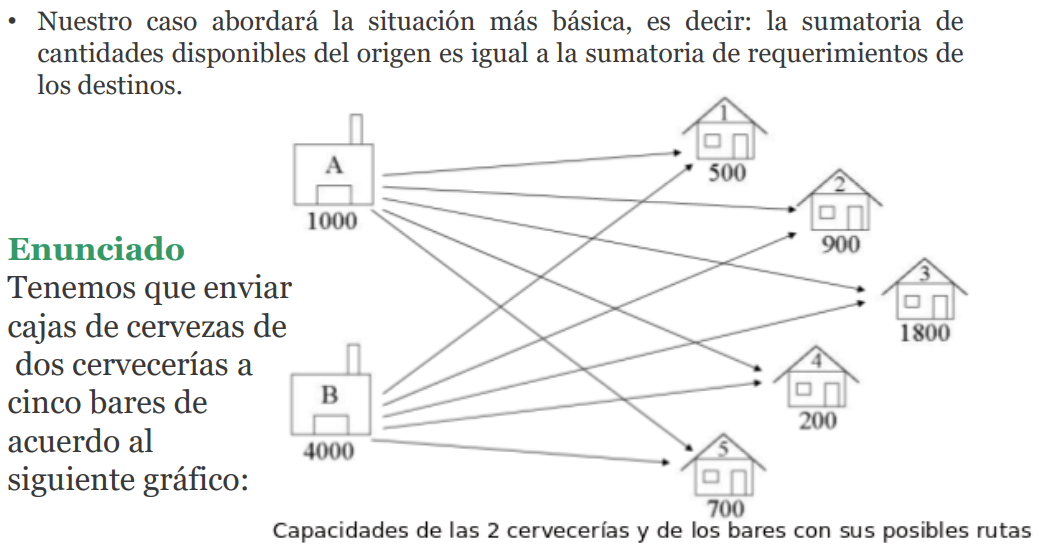

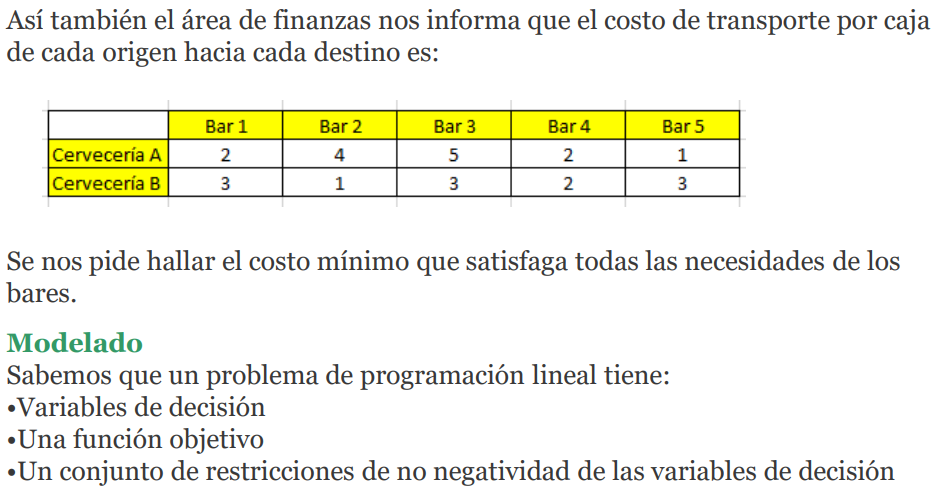

In [14]:
### Bibliotecas 
# instalar pulp: pip install pulp
import pandas as np
from pulp import *
from pandas import DataFrame

In [27]:
### Ciudades
origen = ['A','B']
destino = ['1','2','3','4','5']

In [28]:
oferta = {'A': 1000, 'B' : 4000}
demanda = {'1': 500, '2' : 900, '3' : 1800, '4' : 200, '5' : 700}

In [29]:
costo_envio ={'A':{'1': 2, '2' : 4, '3' : 5, '4' : 2, '5' : 1},
             'B':{'1': 3, '2' : 1, '3' : 3, '4' : 2, '5' : 3}}

In [30]:
### Resolviendo el problema
### Declaramos la función objetivo... nota que buscamos minimizar el costo(LpMinimize)
prob = LpProblem('Transporte', LpMinimize)

In [31]:
rutas = [(i,j) for i in origen for j in destino]

In [32]:
cantidad = LpVariable.dicts('Cantidad de Envio',(origen,destino),0)

In [33]:
prob += lpSum(cantidad[i][j]*costo_envio[i][j] for (i,j) in rutas)

In [34]:
for j in destino:
    prob += lpSum(cantidad[i][j] for i in origen) == demanda[j]

In [35]:
for i in origen:
    prob += lpSum(cantidad[i][j] for j in destino) <= oferta[i]

In [36]:
### Resolvemos e imprimimos el Status, si es Optimo, el problema tiene solución.
prob.solve()
print("Status:", LpStatus[prob.status])

Status: Optimal


In [37]:

### Imprimimos la solución
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)
print('El costo mínimo es:', value(prob.objective))

Cantidad_de_Envio_A_1 = 300.0
Cantidad_de_Envio_A_5 = 700.0
Cantidad_de_Envio_B_1 = 200.0
Cantidad_de_Envio_B_2 = 900.0
Cantidad_de_Envio_B_3 = 1800.0
Cantidad_de_Envio_B_4 = 200.0
El costo mínimo es: 8600.0
